<a href="https://colab.research.google.com/github/rominicky/mineria-texto-python/blob/main/ulrich_exploraciones_textuales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Notebook del Laboratorio de investigaciones en Humanidades Digitales sobre [Viaje al Río de la Plata de Ulrico Schmidel](https://github.com/hdlabconicet/viaje-al-rio-de-la-plata)

##### Diseñada por [Romina De León](rdeleon@conicet.gov.ar) (CONICET)

Esta notebook tiene como objetivo trabajar sobre los texto en formato plano y en los archivos XML realizados para el proyecto [Viaje al Río de la Plata de Ulrico Schmidel](https://github.com/hdlabconicet/viaje-al-rio-de-la-plata), con los mismo se busco generar visualizaciones del análisis textual, así como en las relaciones entre personajes, pueblos originarios en los trayectos y episodios de esta crónica.
Para ello se utilizaron diversas librerías

In [ ]:
!pip install spacy
!python -m spacy download es_core_news_md
!pip install networkx matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 MB 13.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
# Cargamos el texto desde GitHub

import requests

def download_text_from_url(url):
    try:
        response = requests.get(url)
        response.raise_for_status()  # Excepciones por error de acceso
        return response.text
    except requests.exceptions.RequestException as e:
        print(f"Error downloading file from URL: {e}")
        return None

# Example usage
url = "https://raw.githubusercontent.com/hdlabconicet/viaje-al-rio-de-la-plata/refs/heads/main/assets/ulrico_schmidl.txt"
ulrico_txt = download_text_from_url(url)

if text:
    print(ulrico_txt[:100])

else:
    print("Failed to download the file")


VIAJE DE ULRICH SCHMÍDEL AL RÍO DE LA PLATA ( AMÉRICA DEL SUD )

VIAJE DE ULRICH SCHMIDEL AL RÍO DE 


Para proceder en el análisis textual trabajaremos en el archivo de texto plano de la obra de Ulrico Schmidel


##### Sumar stopwords del siglo XVI

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Recursos de NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
# Stopwords para el español del siglo XVI, debo ampliarlo
stopwords_siglo_XVI = set({
    'aquel', 'à', 'á', 'i', 'o', 'ó', 'ò', 'aquella', 'aquelos', 'aquelas', 'hast', 'dende', 'dixo', 'dixeron', 'dixieron', 'assí', 'assi', 'desque'
})

# Stopwords estándar y del siglo XVI
nltk_stopwords = set(stopwords.words('spanish'))
stopwords_completas = nltk_stopwords.union(stopwords_siglo_XVI)

# Función de limpieza del texto
def limpiar_texto(texto):
    texto = re.sub(r"[^a-zA-ZáéíóúÁÉÍÓÚñÑüÜ\s]", "", texto, flags=re.UNICODE)
    palabras = texto.lower().split()
    palabras_filtradas = [palabra for palabra in palabras if palabra not in stopwords_completas]
    return " ".join(palabras_filtradas)

# Función para limpiar y tokenizar
def clean_and_tokenize(text):
    # Eliminar caracteres especiales y tokenizar
    tokens = word_tokenize(re.sub(r'[^a-zA-ZáéíóúÁÉÍÓÚñÑüÜ]', ' ', text.lower()))
    # Filtrar stopwords
    tokens = [word for word in tokens if word not in stopwords_completas]
    return tokens

In [ ]:
#carga de texto para limpieza
text = ulrico_txt
texto_limpio = limpiar_texto(text)

# Guarda el texto limpio
with open('texto_limpio.txt', 'w', encoding='utf-8') as file:
    file.write(texto_limpio)

print("Archivo 'texto_limpio.txt' creado exitosamente.")
print(texto_limpio[:100])

Archivo 'texto_limpio.txt' creado exitosamente.
viaje ulrich schmídel río plata américa sud viaje ulrich schmidel río plata año cuenta después nacid


In [ ]:
texto = ulrico_txt
# Aplicar la función clean_and_tokenize
tokens = clean_and_tokenize(texto)

# Guardar los tokens en un archivo (como texto o como lista)
with open("ulrico_tokens.txt", "w", encoding="utf-8") as archivo_salida:
    archivo_salida.write(" ".join(tokens))  # Los tokens se guardan como texto

print("Tokens guardados en 'ulrico_tokens.txt'.")
print(tokens[:25])

Tokens guardados en 'ulrico_tokens.txt'.
['viaje', 'ulrich', 'schmídel', 'río', 'plata', 'américa', 'sud', 'viaje', 'ulrich', 'schmidel', 'río', 'plata', 'año', 'cuenta', 'después', 'nacido', 'cristo', 'amado', 'señor', 'redentor', 'ulerich', 'schmidel', 'straubing', 'visto', 'siguientes']


In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
import nltk
import spacy
import pandas as pd

nltk.download('punkt')  # Para la tokenización
nltk.download('averaged_perceptron_tagger')  # Para el etiquetado POS
# Cargar el modelo en español de spaCy
nlp = spacy.load("es_core_news_md")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
# Procesamiento con spaCy
doc = nlp(texto)

# lista de tuplas (palabra, etiqueta POS)
datos = [(token.text, token.pos_) for token in doc]

# Conversión de la lista en un dataframe
df = pd.DataFrame(datos, columns=["Palabra", "Etiqueta_POS"])

# Guardado del DataFrame en CSV
df.to_csv("etiquetas_pos_ulrico.csv", index=False, encoding="utf-8")

print("Archivo CSV generado con éxito: etiquetas_pos_ulrico.csv")

print(df.head(20))

Archivo CSV generado con éxito: etiquetas_pos_ulrico.csv
     Palabra Etiqueta_POS
0      VIAJE        PROPN
1         DE          ADP
2     ULRICH        PROPN
3   SCHMÍDEL        PROPN
4         AL          ADP
5        RÍO        PROPN
6         DE          ADP
7         LA          DET
8      PLATA         NOUN
9          (        PUNCT
10   AMÉRICA        PROPN
11       DEL          ADP
12       SUD        PROPN
13         )        PUNCT
14      \n\n        SPACE
15     VIAJE         NOUN
16        DE          ADP
17    ULRICH        PROPN
18  SCHMIDEL        PROPN
19        AL          ADP


### Cálculo de etiquetas POS

In [ ]:
# Calculo de cada tipo de etiqueta POS
pos_counts = df['Etiqueta_POS'].value_counts()
pos_counts

,count
Etiqueta_POS,
NOUN,5246
ADP,4538
PUNCT,4469
DET,3626
VERB,3594
PRON,3336
PROPN,2596
ADV,1901
CCONJ,1773


### Cálculo de sustantivos, adjetivos y verbos más comunes y sus gráficos

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Función que trae palabras más frecuentes con etiqueta POS
def get_top_n_words(df, pos_tag, n=20):
    words = df[df['Etiqueta_POS'] == pos_tag]['Palabra'].value_counts().head(n)
    return words

# Más frecuentes según categoría gramatical
top_nouns = get_top_n_words(df, 'NOUN')
top_adjectives = get_top_n_words(df, 'ADJ')
top_verbs = get_top_n_words(df, 'VERB')

# Impresión palabras más frecuentes
print("Sustantivos más frecuentes:\n", top_nouns)
print("\nAdjetivos más frecuentes:\n", top_adjectives)
print("\nVerbos más frecuentes:\n", top_verbs)


Sustantivos más frecuentes:
 Palabra
capitán    216
tierra     139
gente      128
pueblo     124
agua       102
días        99
leguas      95
millas      94
hombres     93
ciudad      80
navíos      80
camino      70
nación      65
tiempo      64
día         55
mujeres     55
viaje       51
navío       47
cosa        47
seguida     38
Name: count, dtype: int64

Adjetivos más frecuentes:
 Palabra
general      48
llamada      47
dicho        42
gran         33
llamado      32
grandes      28
grande       27
dichos       25
largo        17
largos       17
buena        17
buen         16
principal    14
turco        14
pescado      14
enteros      13
junto        13
susodicho    12
juntos       11
corriente    11
Name: count, dtype: int64

Verbos más frecuentes:
 Palabra
llegamos     71
tienen       48
hizo         44
comer        42
quedamos     34
hacer        28
tiene        27
marchamos    27
teníamos     24
tenían       24
llama        23
tenía        23
dijo         23
hacen        2

In [ ]:
#Cálculo de nombres y lugares en el texto de Viaje de Ulrich Schmídel al Río de la Plata
import spacy

nlp_es = spacy.load("es_core_news_md")

def find_names_and_places(text, language="es"):
    if language == "es":
        doc = nlp_es(text)
    else:
        raise ValueError("Error de idioma")

    names = []
    places = []
    for ent in doc.ents:
        if ent.label_ == "PER":
            names.append(ent.text)
        elif ent.label_ == "LOC" or ent.label_ == "GPE":
            places.append(ent.text)

    return names, places


text = ulrico_txt

#Find names and places in Spanish
spanish_names, spanish_places = find_names_and_places(text, language="es")

print("Nombres", spanish_names[:25])
print("Lugares:", spanish_places[:25])


Nombres ['Cristo', 'Señor', 'Redentor', 'Ulerich Schmidel', 'Straubing', 'Hispaniam', 'Pietro Mandossa', 'Sewastian Neithart', 'Jacoben Welser de Niremburgo', 'Heinrich Paimen', 'Alto-Alemanes', 'Sannt Bartholomei', 'Polmant', 'Españoles', 'Pietro Manthossa', 'Jerg Manthossa', 'Pietro Manthossa', 'Jerg Manthossa', 'Heinrich Paimen', 'Heinrich Paimen', 'Hainrich Paimen', 'Jerg Manthossa', 'Jerg Manthossa', 'Jerg Manthossa', 'San Jacob']
Lugares: ['Andorff', 'Amberes', 'España', 'Indiam', 'Indias', 'Andorf', 'Amberes', 'Hispania', 'Khalles', 'Cádiz', 'Khalles', 'Cádiz', 'Indiam', 'Indias', 'Españoles', 'Alto-Alemanes', 'Rieo delle Platta', 'Neerlandeses', 'Hispania', 'San Lucas', 'San Lucar de Barrameda', 'Septiembre', 'Dennerieffe', 'Cumero', 'Gomera']


# Gráficos

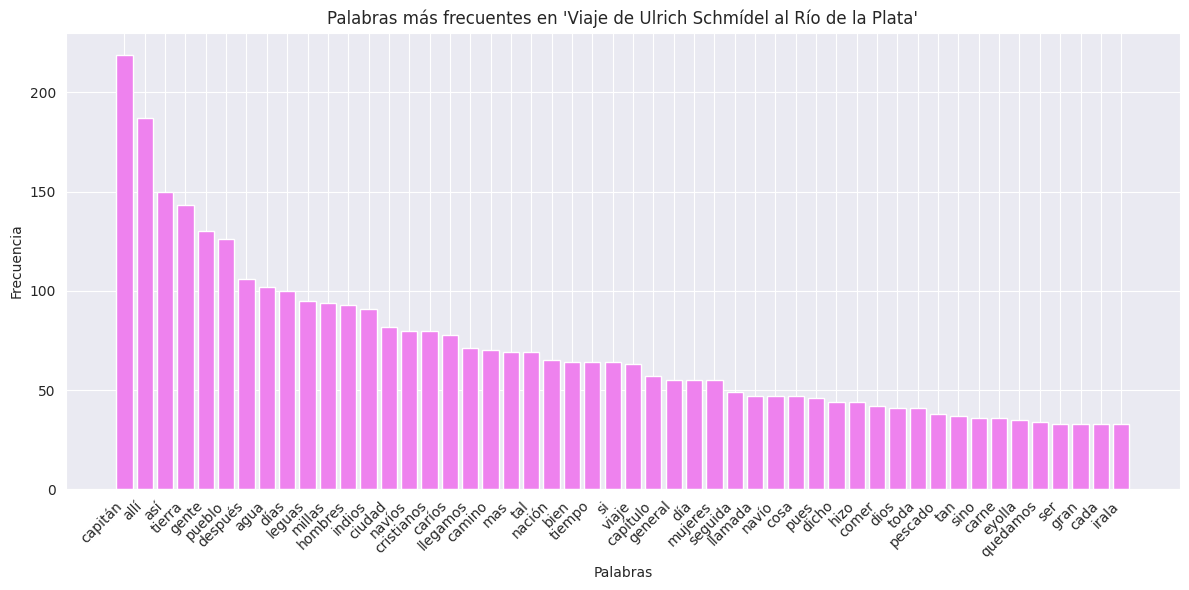

In [ ]:
# Gráfico de palabas más frecuentes en texto_limpio

import matplotlib.pyplot as plt
from collections import Counter

# Lectura de texto_limpio.txt
with open('texto_limpio.txt', 'r', encoding='utf-8') as file:
    texto_limpio = file.read()

# Tokenización
palabras = texto_limpio.split()

# Cálcilo de la frecuencia de cada palabra
frecuencia_palabras = Counter(palabras)

# Palabras más frecuentes
palabras_mas_frecuentes = frecuencia_palabras.most_common(50)

# Separación de palabras y frecuencias
palabras, frecuencias = zip(*palabras_mas_frecuentes)

sns.set_style("darkgrid")
# Creación de gráfico
plt.figure(figsize=(12, 6))
plt.bar(palabras, frecuencias, color='violet')
plt.xlabel("Palabras")
plt.ylabel("Frecuencia")
plt.title("Palabras más frecuentes en 'Viaje de Ulrich Schmídel al Río de la Plata'")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

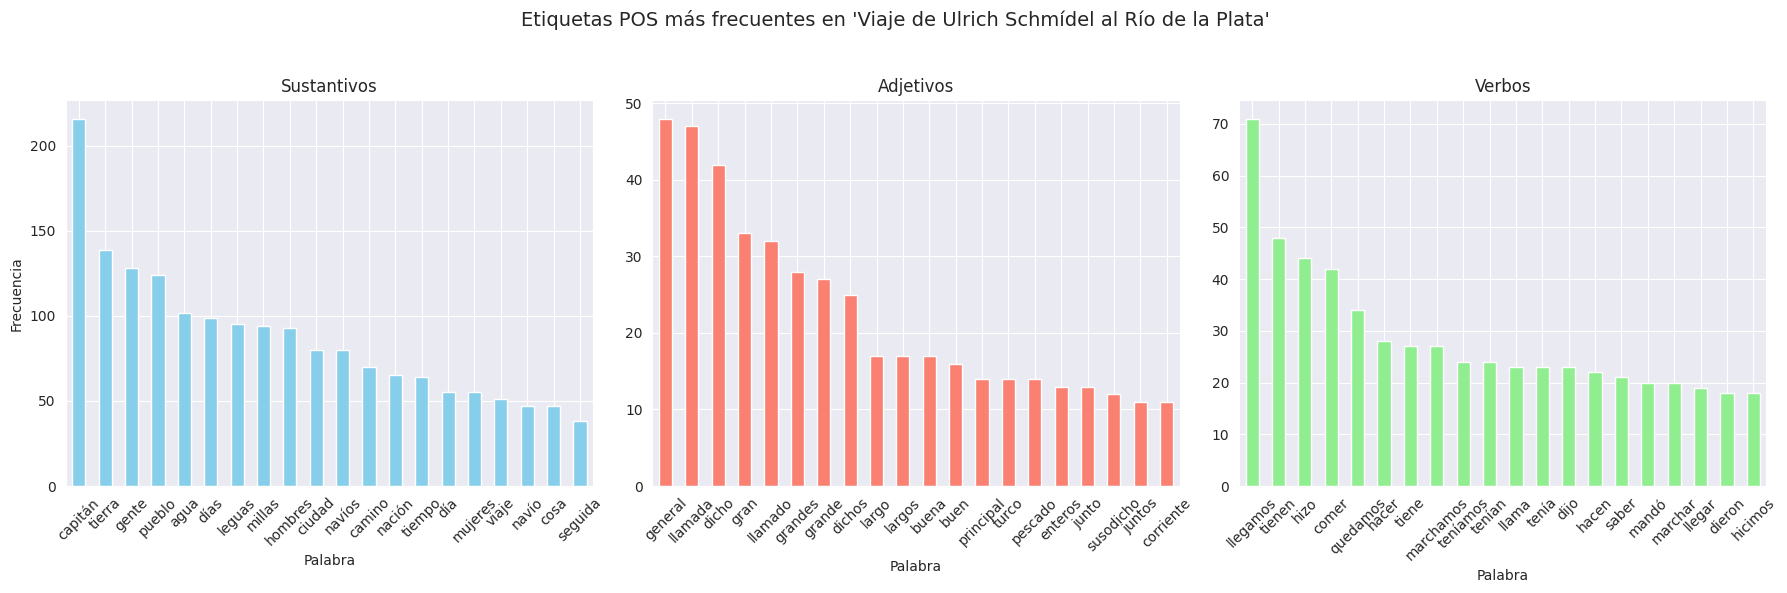

In [ ]:
sns.set_style("darkgrid")

# Tamaño de la figura
plt.figure(figsize=(18, 6))
plt.suptitle("Etiquetas POS más frecuentes en 'Viaje de Ulrich Schmídel al Río de la Plata'", fontsize=14)

# Gráfico de Sustantivos
ax1 = plt.subplot(1, 3, 1)
top_nouns.plot(kind='bar', color='skyblue', ax=ax1)
ax1.set_title('Sustantivos', fontsize=12)
ax1.set_ylabel('Frecuencia', fontsize=10)
ax1.tick_params(axis='x', rotation=45)

# Gráfico de Adjetivos
ax2 = plt.subplot(1, 3, 2)
top_adjectives.plot(kind='bar', color='salmon', ax=ax2)
ax2.set_title('Adjetivos', fontsize=12)
ax2.tick_params(axis='x', rotation=45)

# Gráfico de Verbos
ax3 = plt.subplot(1, 3, 3)
top_verbs.plot(kind='bar', color='lightgreen', ax=ax3)
ax3.set_title('Verbos', fontsize=12)
ax3.tick_params(axis='x', rotation=45)

# Ajustar el espaciado
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

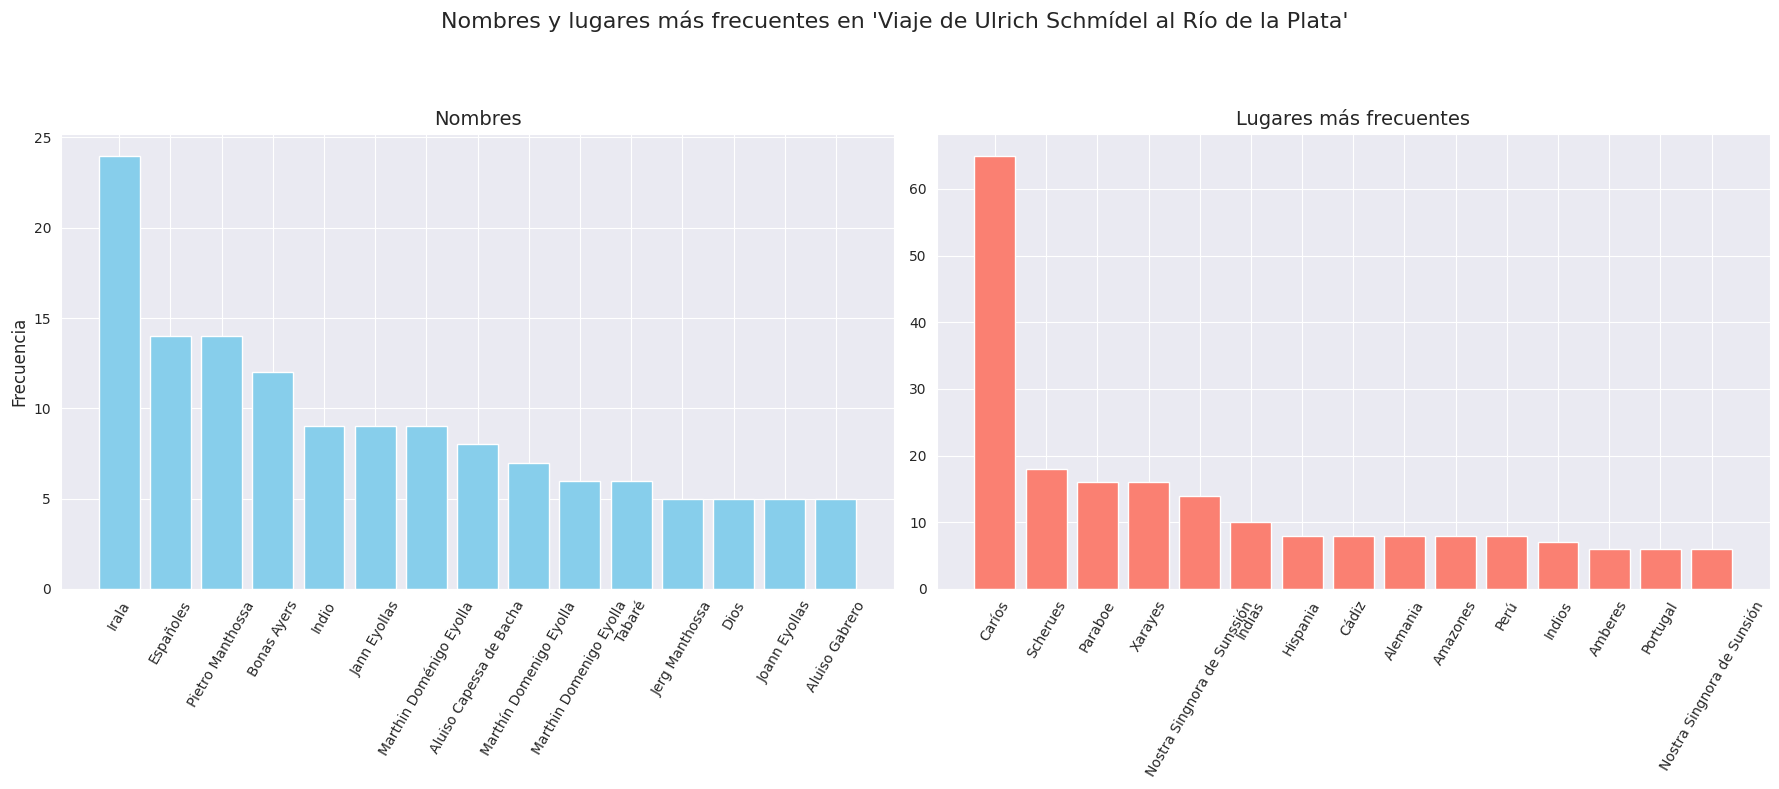

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

# Cálculo de la frecuencia de nombres y lugares
name_counts = Counter(spanish_names)
place_counts = Counter(spanish_places)

#Listas para graficar
names, name_freqs = zip(*name_counts.most_common(15))
places, place_freqs = zip(*place_counts.most_common(15))

# Tamaño de la figura
plt.figure(figsize=(18, 8))
plt.suptitle("Nombres y lugares más frecuentes en 'Viaje de Ulrich Schmídel al Río de la Plata'", fontsize=16)

# Gráfico de Nombres
ax1 = plt.subplot(1, 2, 1)
ax1.bar(names, name_freqs, color='skyblue', width=0.8)
ax1.set_title('Nombres', fontsize=14)
ax1.set_ylabel('Frecuencia', fontsize=12)
ax1.tick_params(axis='x', rotation=60, labelsize=10)

# Gráfico de Lugares
ax2 = plt.subplot(1, 2, 2)
ax2.bar(places, place_freqs, color='salmon', width=0.8)
ax2.set_title('Lugares más frecuentes', fontsize=14)
ax2.tick_params(axis='x', rotation=60, labelsize=10)

# Ajustar el espaciado
plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()
